<center>

# **Multiple Knapsack Problem**

---

### **Descripción del Problema:**

Se tiene una **cantidad ilimitada** de **bolsas** con **capacidad W** de **peso**. 

Se tiene que **acomodar** un conjunto de **objetos O** con **peso wi** cada uno. 

**Encontrar** un **algoritmo** que se encargue de **acomodar todos los objetos** en la **menor cantidad posible** de **bolsas**.

El **objetivo** es **encontrar** la **mejor configuración posible** para **almacenar** las **bolsas**.

---

### **El Problema de la Mochila Múltiple**

El **Problema de la Mochila Múltiple** (**Multiple Knapsack Problem**) es una **variante** del **Problema de la Mochila** (**Knapsack Problem**) en el que se **tienen varios tipos de mochilas**, cada una con su **capacidad máxima de peso**, y un **conjunto de elementos**, donde **cada elemento** tiene un **peso** y un **valor asociado**. El **objetivo** es **determinar** la **combinación** de **elementos** que **maximice el valor total** dentro de las **capacidades** de las **mochilas individuales**, que en este caso son **sustuituidas** por **bolsas** en lugar de mochilas, pero básicamente el **problema** es el **mismo**.

### **Algortimo Voraz**

+ Los **algoritmos voraces (greedy algorithms)**, son algoritmos que **resuelven problemas** mediante la **toma de decisiones locales óptimas** en cada paso, **sin considerar** las posibles **consecuencias futuras** de esas decisiones. 

+ En otras palabras, **en cada paso** del algoritmo, **se toma la mejor decisión posible** basada en la información disponible en ese momento, con la esperanza de que **esa decisión conduzca** a una **solución óptima global**.

#### **Algoritmo Voraz en Lenguaje Natural**

1. **Ordenar** los **elementos** en **orden descendente** de la **relación valor/peso**. Esto nos permitirá **seleccionar** los **elementos más valiosos** en **relación con su peso**.
2. **Inicializar** un **arreglo de mochilas vacías**, donde **cada mochila** tiene una **capacidad máxima** de **peso dada**.
3. **Para cada elemento** en **orden descendente** de la **relación valor/peso**:
    1. **Para cada mochila** disponible:
        1. **Si** el **peso** del **elemento** es **menor o igual** a la **capacidad restante** de la **mochila**, se **agrega** el **elemento** a esa **mochila** y se **actualiza** la **capacidad restante**.
        2. **Si no es posible agregar** el **elemento completo** en esa **mochila**, se **agrega** una **fracción** del **elemento** que **pueda encajar** y se **ajusta la capacidad restante** en consecuencia.
4. **Repetir** el **paso anterior hasta recorrer todos** los **elementos**.
5. **Devolver** la **combinación** de **elementos seleccionados para cada mochila**.

In [12]:
#Importamos el módulo numpy para manejar de manera fácil los elementos de las listas y crear matrices.
import numpy as np

#Creamos la función para implementar el Algoritmo Voraz para resolver el Multiple Knapsack Problem.
def multiple_knapsack_voraz(valores, pesos, capacidades):
    num_elementos = len(valores)
    num_mochilas = len(capacidades)
    
    # Calcular la relación valor/peso para cada elemento
    valor_por_peso = np.divide(valores, pesos)
    
    # Ordenar los elementos en orden decreciente de la relación valor/peso
    indices_ordenados = np.argsort(-valor_por_peso)
    valores_ordenados = valores[indices_ordenados]
    pesos_ordenados = pesos[indices_ordenados]
    
    # Inicializar la matriz de mochilas
    mochilas = np.zeros((num_mochilas, num_elementos))
    
    # Llenar las mochilas
    for indice_elemento in range(num_elementos):
        for indice_mochila in range(num_mochilas):
            if pesos_ordenados[indice_elemento] <= capacidades[indice_mochila]:
                # Si el peso del elemento cabe en la mochila, agregarlo completo
                mochilas[indice_mochila, indice_elemento] = 1
                capacidades[indice_mochila] -= pesos_ordenados[indice_elemento]
            else:
                # Agregar una fracción del elemento que quepa en la mochila
                fraccion = capacidades[indice_mochila] / pesos_ordenados[indice_elemento]
                mochilas[indice_mochila, indice_elemento] = fraccion
                capacidades[indice_mochila] = 0
                break
    
    # Calcular el peso y valor total de las mochilas
    pesos_totales = np.sum(mochilas * pesos, axis=1)
    valores_totales = np.sum(mochilas * valores, axis=1)
    
    # Crear la cadena formateada con la información de las mochilas
    mochilas_info = []
    for indice_mochila in range(num_mochilas):
        elementos = []
        for indice_elemento in range(num_elementos):
            if mochilas[indice_mochila, indice_elemento] > 0:
                elementos.append(f"Elemento{indice_elemento + 1}({pesos[indice_elemento]}, {valores[indice_elemento]})")
        mochilas_info.append(f"Mochila{indice_mochila + 1}(Peso Parcial: {pesos_totales[indice_mochila]}, Valor Parcial: {valores_totales[indice_mochila]}) con elementos {', '.join(elementos)}")
    
    # Crear la cadena formateada con la información de peso y valor total
    peso_total = np.sum(pesos_totales)
    valor_total = np.sum(valores_totales)
    info_total = f"Peso Total: {peso_total}\nValor Total: {valor_total}"
    
    # Unir la información de las mochilas y la información total en una cadena formateada final
    resultado = f"Mochilas: [{', '.join(mochilas_info)}]\n{info_total}"
    
    return resultado

#Ejemplo de uso del Algoritmo Voraz para resolver el Multiple Knapsack Problem.
print(" Parámetros ".center(125, "-"))
pesos=np.random.randint(1, 25, size=10000)
print(f"Pesos: {pesos}")
valores=np.random.randint(1, 10, size=10000)
print(f"Valores: {valores}")
capacidades=np.random.randint(25, 100, size=75)
print(f"Capacidades: {capacidades}")

print(" Resultado ".center(125, "-"))
ejemploVoraz = multiple_knapsack_voraz(valores, pesos, capacidades)
print(ejemploVoraz)

--------------------------------------------------------- Parámetros --------------------------------------------------------
Pesos: [ 3 12  2 ...  4 10 20]
Valores: [6 9 2 ... 3 6 2]
Capacidades: [77 72 25 29 58 90 31 68 94 62 52 54 51 61 92 72 87 72 93 27 57 62 50 73
 65 68 64 97 57 98 84 70 64 35 64 79 74 38 34 59 50 54 65 34 46 65 50 77
 90 75 86 87 92 44 57 56 95 80 92 60 35 28 68 72 57 85 94 86 70 79 35 31
 49 35 38]
--------------------------------------------------------- Resultado ---------------------------------------------------------
Mochilas: [Mochila1(Peso Parcial: 939.0, Valor Parcial: 445.0) con elementos Elemento1(3, 6), Elemento2(12, 9), Elemento3(2, 2), Elemento4(12, 2), Elemento5(21, 5), Elemento6(4, 4), Elemento7(15, 5), Elemento8(6, 4), Elemento9(4, 4), Elemento10(5, 6), Elemento11(22, 5), Elemento12(5, 4), Elemento13(21, 7), Elemento14(9, 3), Elemento15(9, 3), Elemento16(4, 8), Elemento17(24, 1), Elemento18(7, 2), Elemento19(22, 9), Elemento20(11, 8), Elemento21

---

### **Programación Dinámica**

+ La **programación dinámica** es una **técnica** utilizada en informática y matemáticas para **resolver problemas complejos dividiéndolos** en otros **más pequeños** y **resolviendo** cada problema, **guardando** sus **resultados** y **reutilizándolos** en lugar de leerlos nuevamente.  

+ La **programación dinámica** ofrece **beneficios** como la **optimización de tiempo**, la **garantía de solución óptima**, la **reutilización de resultados**, la **versatilidad** y la **escalabilidad**. Estos beneficios hacen que sea una **técnica** valiosa para **resolver problemas computacionales** de manera **eficiente** y **efectiva**.

#### **Algoritmo de Programación Dinámica en Lenguaje Natural**

1. **Crear** una **matriz** de **tamaño** (**num_mochilas + 1**) **x** (**capacidad_máxima + 1**), **inicializada** con **ceros**.
2. **Para cada mochila** **i** de **1** a **num_mochilas** y **para cada** **capacidad j** de **1** a **capacidad_máxima**, realizar lo siguiente:
    1. **Inicializar** el **valor máximo** para la **celda [i][j]** como el **valor obtenido** en la **mochila anterior** **[i-1][j]**.
    2. **Para cada elemento k** de **1** a **num_elementos**, **verificar** **si** el **peso** del **elemento k** es **menor o igual** a la **capacidad j** de la **mochila actual**:
        1. **Si es así**, **calcular** el **valor máximo** **entre** el **valor actual [i][j]** y el **valor obtenido al agregar el elemento k a la mochila actual**, que se calcula como **celda[i-1][j-peso[k]] + valor[k]**. **Actualizar** el **valor máximo** en la **celda[i][j]** si es necesario.
3. **Después** de **completar** la **matriz**, se puede **recuperar** la **combinación óptima** de **elementos seleccionados** para **cada mochila**:
    1. **Comenzando** desde la **última mochila** y la **capacidad máxima**, **verificar** si el **valor** en **celda[i][j]** es **igual al valor obtenido** al **no incluir el último elemento**. **Si** es **igual**, el **elemento no se incluyó en la mochila actual**. De lo **contrario**, el **elemento se incluyó en la mochila actual** y se **pasa** a la **siguiente mochila** y **capacidad restante j-peso[elemento]**.
4. **Calcular** el **peso total** y el **valor total** de la **combinación óptima** de **elementos seleccionados** para **todas** las **mochilas**.
5. **Devolver** los **resultados**, que pueden **incluir** la **combinación de elementos seleccionados para cada mochila**, el **peso total** y el **valor total**.

In [13]:
#Importamos el módulo numpy para manejar de manera fácil los elementos de las listas y crear matrices.
import numpy as np

#Creamos la función para implementar el Algoritmo de Programación Dinámica para resolver el Multiple Knapsack Problem.
def multiple_knapsack_dp(valores, pesos, capacidades):
    num_elementos = len(valores)
    num_mochilas = len(capacidades)
    
    # Crear una matriz para almacenar los resultados intermedios
    dp = [[0] * (capacidad + 1) for capacidad in capacidades]
    
    # Calcular los valores máximos para cada capacidad y mochila
    for mochila in range(num_mochilas):
        for capacidad in range(1, capacidades[mochila] + 1):
            # Calcular el valor máximo considerando los elementos anteriores y la capacidad actual
            valor_maximo = 0
            for elemento in range(num_elementos):
                if pesos[elemento] <= capacidad:
                    valor_maximo = max(valor_maximo, dp[mochila][capacidad - pesos[elemento]] + valores[elemento])
            # Almacenar el valor máximo en la matriz dp
            dp[mochila][capacidad] = valor_maximo
    
    # Recuperar la combinación óptima de elementos seleccionados
    combinaciones = [[] for _ in range(num_mochilas)]
    for mochila in range(num_mochilas):
        capacidad_actual = capacidades[mochila]
        for elemento in range(num_elementos - 1, -1, -1):
            # Verificar si el elemento fue seleccionado para la mochila actual
            if capacidad_actual >= pesos[elemento] and dp[mochila][capacidad_actual] == dp[mochila][capacidad_actual - pesos[elemento]] + valores[elemento]:
                combinaciones[mochila].append(elemento)
                capacidad_actual -= pesos[elemento]
    
    # Crear la cadena formateada con la información de las mochilas y los valores totales
    resultado = "Mochilas:\n"
    for mochila in range(num_mochilas):
        resultado += f"Mochila{mochila + 1}(Peso Parcial: {sum([pesos[elemento] for elemento in combinaciones[mochila]])}, Valor Parcial: {sum([valores[elemento] for elemento in combinaciones[mochila]])}) con elementos "
        for elemento in combinaciones[mochila]:
            resultado += f"Elemento{elemento + 1}({pesos[elemento]}, {valores[elemento]}), "
        resultado += "\n"
    
    peso_total = sum([pesos[elemento] for mochila in range(num_mochilas) for elemento in combinaciones[mochila]])
    valor_total = sum([valores[elemento] for mochila in range(num_mochilas) for elemento in combinaciones[mochila]])
    
    resultado += f"Peso Total: {peso_total}\nValor Total: {valor_total}"
    
    return resultado

#Ejemplo de uso del Algoritmo Voraz para resolver el Multiple Knapsack Problem.
print(" Parámetros ".center(125, "-"))
print(f"Pesos: {pesos}")
print(f"Valores: {valores}")
print(f"Capacidades: {capacidades}")

print(" Resultado ".center(125, "-"))
ejemploDynammicProgramming = multiple_knapsack_dp(valores, pesos, capacidades)
print(ejemploDynammicProgramming)

--------------------------------------------------------- Parámetros --------------------------------------------------------
Pesos: [ 3 12  2 ...  4 10 20]
Valores: [6 9 2 ... 3 6 2]
Capacidades: [ 0  0  0  4 33 65  6 43 69 37 27 29 26 36 67 47 62 47 68  2 32 37 25 48
 40 43 39 72 32 73 59 45 39 10 39 54 49 13  9 34 25 29 40  9 21 40 25 52
 65 50 61 62 67 19 32 31 70 55 67 35 10  3 43 47 32 60 69 61 45 54 10  6
 24 10 13]
--------------------------------------------------------- Resultado ---------------------------------------------------------
Mochilas:
Mochila1(Peso Parcial: 0, Valor Parcial: 0) con elementos 
Mochila2(Peso Parcial: 0, Valor Parcial: 0) con elementos 
Mochila3(Peso Parcial: 0, Valor Parcial: 0) con elementos 
Mochila4(Peso Parcial: 4, Valor Parcial: 36) con elementos Elemento9969(1, 9), Elemento9885(1, 9), Elemento9290(1, 9), Elemento9070(1, 9), 
Mochila5(Peso Parcial: 33, Valor Parcial: 297) con elementos Elemento9969(1, 9), Elemento9885(1, 9), Elemento9290(1, 9),

---

<center>

### **Complejidad Temporal y Espacial del Algoritmo de Programación Dinámica para el Multiple Knapsack Problem**

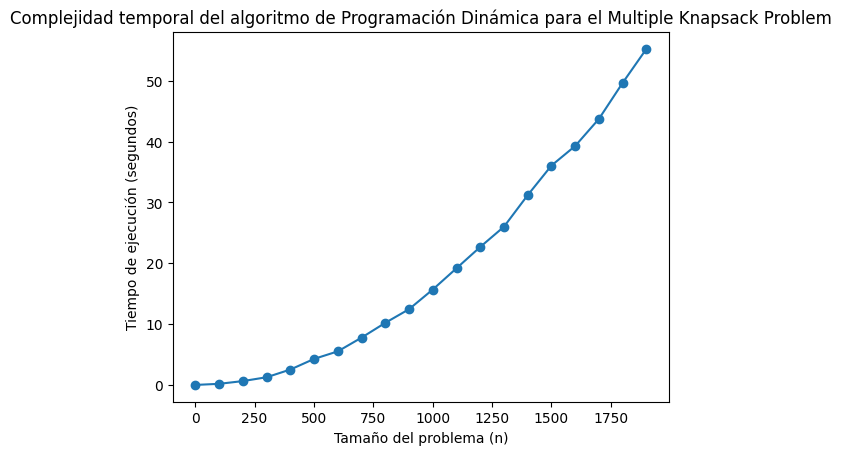

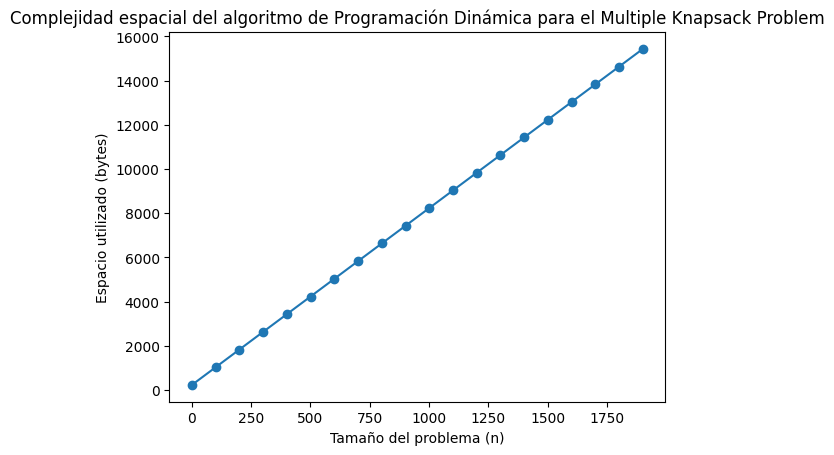

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

#Creamos la función para implementar el Algoritmo de Programación Dinámica para resolver el Multiple Knapsack Problem.
def multiple_knapsack_dp(valores, pesos, capacidades):
    num_elementos = len(valores)
    num_mochilas = len(capacidades)
    
    # Crear una matriz para almacenar los resultados intermedios
    dp = [[0] * (capacidad + 1) for capacidad in capacidades]
    
    # Calcular los valores máximos para cada capacidad y mochila
    for mochila in range(num_mochilas):
        for capacidad in range(1, capacidades[mochila] + 1):
            # Calcular el valor máximo considerando los elementos anteriores y la capacidad actual
            valor_maximo = 0
            for elemento in range(num_elementos):
                if pesos[elemento] <= capacidad:
                    valor_maximo = max(valor_maximo, dp[mochila][capacidad - pesos[elemento]] + valores[elemento])
            # Almacenar el valor máximo en la matriz dp
            dp[mochila][capacidad] = valor_maximo
    
    # Recuperar la combinación óptima de elementos seleccionados
    combinaciones = [[] for _ in range(num_mochilas)]
    for mochila in range(num_mochilas):
        capacidad_actual = capacidades[mochila]
        for elemento in range(num_elementos - 1, -1, -1):
            # Verificar si el elemento fue seleccionado para la mochila actual
            if capacidad_actual >= pesos[elemento] and dp[mochila][capacidad_actual] == dp[mochila][capacidad_actual - pesos[elemento]] + valores[elemento]:
                combinaciones[mochila].append(elemento)
                capacidad_actual -= pesos[elemento]
    
    # Crear la cadena formateada con la información de las mochilas y los valores totales
    resultado = "Mochilas:\n"
    for mochila in range(num_mochilas):
        resultado += f"Mochila{mochila + 1}(Peso Parcial: {sum([pesos[elemento] for elemento in combinaciones[mochila]])}, Valor Parcial: {sum([valores[elemento] for elemento in combinaciones[mochila]])}) con elementos "
        for elemento in combinaciones[mochila]:
            resultado += f"Elemento{elemento + 1}({pesos[elemento]}, {valores[elemento]}), "
        resultado += "\n"
    
    peso_total = sum([pesos[elemento] for mochila in range(num_mochilas) for elemento in combinaciones[mochila]])
    valor_total = sum([valores[elemento] for mochila in range(num_mochilas) for elemento in combinaciones[mochila]])
    
    resultado += f"Peso Total: {peso_total}\nValor Total: {valor_total}"
    
    return resultado

# Generar datos para la gráfica
tamanos = np.arange(1, 2001, 100)
tiempos = []
espacios = []

for n in tamanos:
    pesos = np.random.randint(1, 100, size=n)
    valores = np.random.randint(1, 100, size=n)
    capacidades= np.random.randint(1, 100, size=n)

    # Medir tiempo de ejecución
    tiempo_inicio = time.time()
    multiple_knapsack_dp(valores, pesos, capacidades)
    tiempo_fin = time.time()
    tiempo_ejecucion = tiempo_fin - tiempo_inicio
    tiempos.append(tiempo_ejecucion)

    # Medir espacio utilizado
    espacio_utilizado = sys.getsizeof(pesos) + sys.getsizeof(valores)
    espacios.append(espacio_utilizado)

# Graficar complejidad temporal
plt.plot(tamanos, tiempos, marker='o')
plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Complejidad temporal del algoritmo de Programación Dinámica para el Multiple Knapsack Problem')
plt.show()

# Graficar complejidad espacial
plt.plot(tamanos, espacios, marker='o')
plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Espacio utilizado (bytes)')
plt.title('Complejidad espacial del algoritmo de Programación Dinámica para el Multiple Knapsack Problem')
plt.show()


---